Завдання 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [2]:
df = pd.read_csv('../data/heart.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [4]:
df.duplicated().sum()

np.int64(3680)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.30,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.00,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.90,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.20,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.00,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,75.0,0,582,1,30,1,263358.03,1.83,134,1,0,23,1
4855,73.0,0,582,0,20,0,263358.03,1.83,134,1,1,198,1
4862,45.0,0,220,0,35,0,174000.00,0.80,139,1,1,121,0
4965,40.0,1,129,1,35,0,255000.00,0.90,137,1,0,209,0


In [7]:
TARGET = 'DEATH_EVENT'
FEATURES = [col for col in df.columns if col != TARGET]

# Визначення категоріальних та числових ознак
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

# Виведення результатів
print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')

print(f'Number of continuous features: {len(cont_features)}')
print('Continuous features:', cont_features, '\n')

Number of categorical features: 6
Categorical features: ['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking'] 

Number of continuous features: 6
Continuous features: ['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 



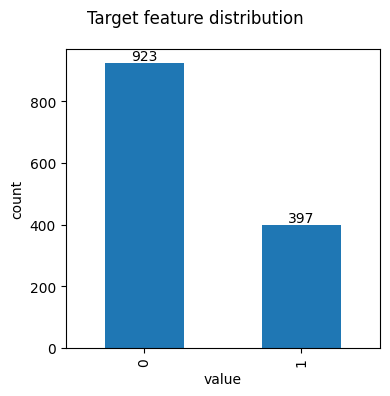

In [8]:
ax = df[TARGET].value_counts().plot(kind='bar', figsize=(4, 4))
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel("value")
  ax.set_ylabel("count")

plt.suptitle("Target feature distribution")

plt.tight_layout()
plt.show()

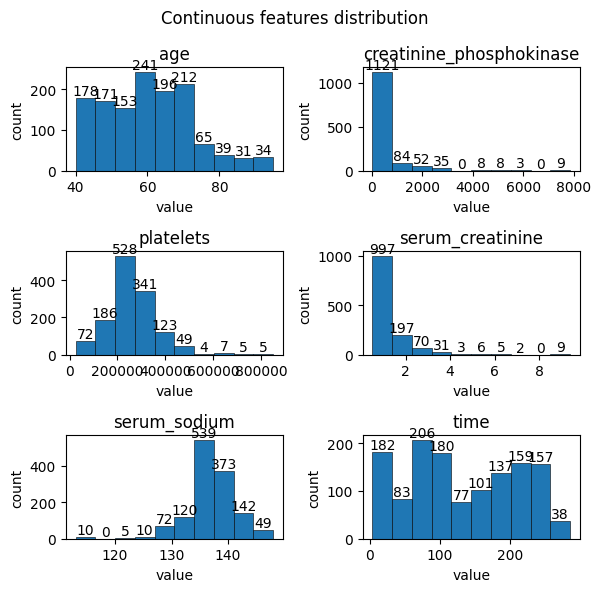

In [9]:
ax = df.loc[:, cont_features].hist(figsize=(6, 6), grid=False, edgecolor='black', linewidth=.4)
for row in ax:
  for col in row:
    for i in col.containers:
      col.bar_label(i)
      col.set_xlabel("value")
      col.set_ylabel("count")

plt.suptitle("Continuous features distribution")

plt.tight_layout()
plt.show()

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,60.587377,0.485606,576.135606,0.446970,37.881818,0.369697,263751.982189,1.356447,136.665909,0.645455,0.307576,132.678788,0.300758
std,11.913538,0.499982,970.630878,0.497368,11.572547,0.482906,106345.010143,0.998924,4.380990,0.478557,0.461665,77.779493,0.458761
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,115.000000,0.000000,30.000000,0.000000,208000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,249.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.300000,140.000000,1.000000,1.000000,206.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [12]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [13]:
# Розрахунок кореляції
correlation_matrix = df.corr()

# Виведення кореляцій з цільовою змінною 'DEATH_EVENT'
correlation_with_class = correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)
correlation_with_class

DEATH_EVENT                 1.000000
serum_creatinine            0.290229
age                         0.224602
high_blood_pressure         0.113721
anaemia                     0.063510
creatinine_phosphokinase    0.055221
sex                         0.044045
smoking                     0.006774
diabetes                   -0.001485
platelets                  -0.044523
serum_sodium               -0.250990
ejection_fraction          -0.271767
time                       -0.507374
Name: DEATH_EVENT, dtype: float64

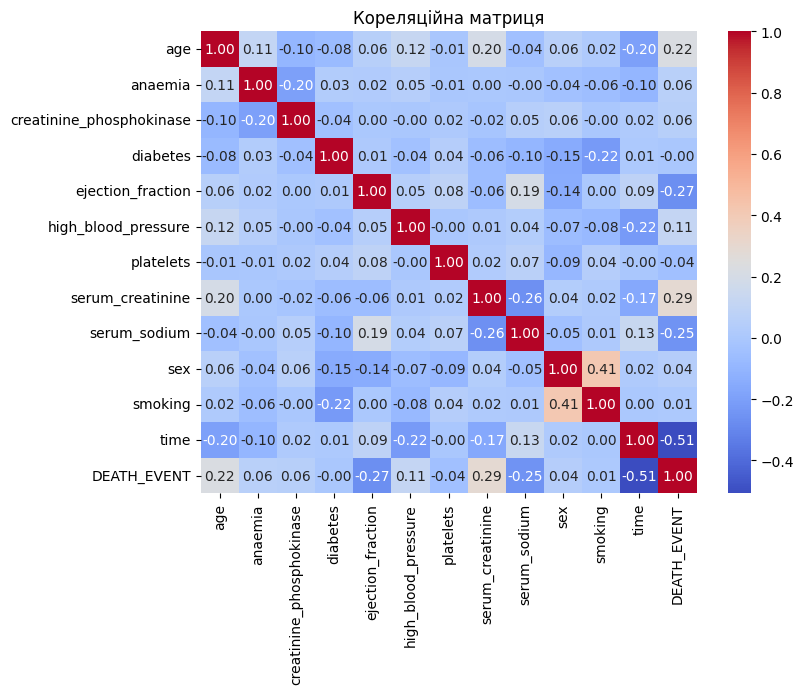

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця')
plt.show()

In [15]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Розділяємо на навчальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
log_reg = LogisticRegression()

# Визначаємо сітку параметрів для пошуку
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # параметр регуляризації
    'solver': ['lbfgs', 'liblinear'],  # алгоритми оптимізації
    'max_iter': [100, 200, 300]  # кількість ітерацій
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Отримуємо найкращі параметри
best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

Найкращі параметри:  {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


In [18]:
# Прогнозуємо, використовуючи найкращу модель
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [19]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       194
           1       0.70      0.70      0.70        70

    accuracy                           0.84       264
   macro avg       0.80      0.80      0.80       264
weighted avg       0.84      0.84      0.84       264



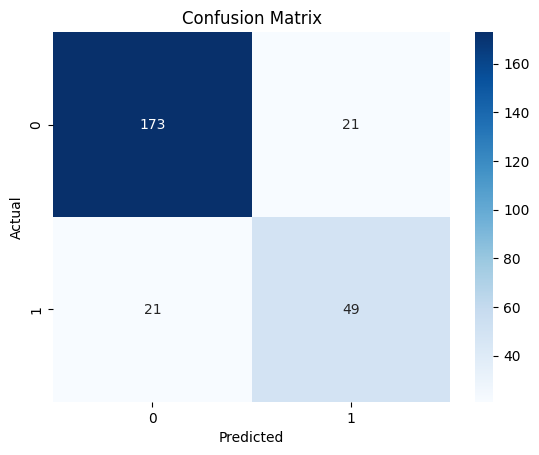

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
import numpy as np
# Отримуємо DataFrame з тестовими даними, справжніми та прогнозованими результатами
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Вибираємо 10 випадкових прикладів
random_indices = np.random.choice(results.index, 10, replace=False)
random_results = results.loc[random_indices]

# Виводимо ці приклади
print(random_results)

      True Label  Predicted Label
1753           1                0
1152           1                1
1515           0                0
1352           1                1
518            1                1
966            1                1
837            0                0
758            0                0
932            1                1
985            0                1


In [22]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       194
           1       0.59      0.73      0.65        70

    accuracy                           0.80       264
   macro avg       0.74      0.77      0.75       264
weighted avg       0.81      0.80      0.80       264



**Логістична регресія**

In [24]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [25]:
#Для подальших коректних обрахунків транспонуємо матрицю вхідних ознак і вектор цільової змінної.

x_train = X_train.T
x_test = X_test.T
y_train = np.expand_dims(y_train.T, 0)
y_test = np.expand_dims(y_test.T, 0)

print('X train size', x_train.shape)
print('X test size', x_test.shape)
print('y train size', y_train.shape)
print('y test size', y_test.shape)

X train size (12, 1056)
X test size (12, 264)
y train size (1, 1056)
y test size (1, 264)


In [26]:
#Ініціалізація параметрів моделі
def initialize_weights_and_bias(dimension):
    # dimension - number of input features
    w = np.full((dimension,), 0.01)  # Одновимірний масив
    b = 0.0
    return w, b

In [27]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [28]:
def forward_backward_propagation(w,b,x_train,y_train, eps=1e-5):

    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -1*y_train*np.log(y_head+eps)-(1-y_train)*np.log(1-y_head+eps)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling

    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T)) / x_train.shape[1]).squeeze()
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [29]:
def compute_accuracy(y_head, y_train):
    predictions = (y_head > 0.5).astype(int)  # Бінарне перетворення ймовірностей у класи
    accuracy = np.mean(predictions == y_train)  # Середня точність
    return accuracy

In [30]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    accuracy_list = []
    index = []

    for i in range(number_of_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        y_head = sigmoid(np.dot(w.T, x_train) + b)
        accuracy = compute_accuracy(y_head, y_train)

        cost_list.append(cost)
        accuracy_list.append(accuracy)
        index.append(i)

        w = w - learning_rate * gradients["derivative_weight"].squeeze()
        b = b - learning_rate * gradients["derivative_bias"]

    parameters = {"weight": w, "bias": b}

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(index, cost_list, label='Cost')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title('Графік функції втрат')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(index, accuracy_list, label='Accuracy', color='orange')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.title('Графік точності')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return parameters, gradients, cost_list, accuracy_list

In [31]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)

    # Гарантуємо, що z має форму (1, N)
    z = z.reshape(1, -1)

    Y_prediction = np.zeros((1, z.shape[1]))

    # Якщо z > 0.5, то клас 1, інакше 0
    for i in range(z.shape[1]):
        Y_prediction[0, i] = 1 if z[0, i] > 0.5 else 0

    return Y_prediction

In [32]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # Ініціалізація
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Оновлення параметрів і отримання всіх значень
    parameters, gradients, cost_list, accuracy_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    # Прогнозування
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    # Розрахунок точності
    train_accuracy = np.mean(y_prediction_train == y_train) * 100
    test_accuracy = np.mean(y_prediction_test == y_test) * 100

    # Виведення точності
    print("Train accuracy: {:.2f} %".format(train_accuracy))
    print("Test accuracy: {:.2f} %".format(test_accuracy))

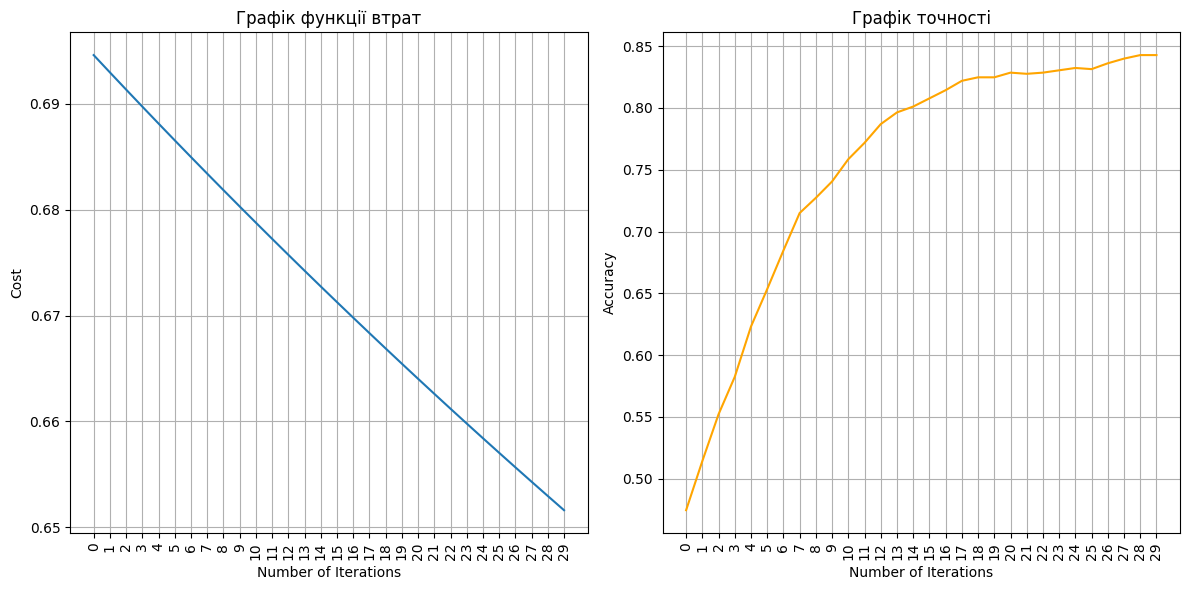

Train accuracy: 84.28 %
Test accuracy: 81.82 %


In [33]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 30)